In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
#read the data
df_train = pd.read_csv("C:/Users/DELL/workspace/sentiment-analysis/data/train.csv")
df_train.head()

,artist,song,text,Subjectivity,Polarity,Sentiment
0,Adele,All I Ask,I will leave my heart at the door I won't say...,0.543827,-0.069444,Negative
1,Adele,Can't Let Go,"When did it go wrong, I will never know I hav...",0.600926,-0.105370,Negative
2,Adele,Crazy For You,"Found myself today singing out your name, You ...",0.655926,-0.227037,Negative
3,Adele,Daydreamer,Daydreamer Sitting on the sea Soaking up the s...,0.383333,0.054630,Positive
4,Adele,Hello,"Hello, it's me I was wondering if after all t...",0.533000,-0.153667,Negative


In [3]:
#identify the null values
df_train[df_train.isnull().any(axis = 1)]

,artist,song,text,Subjectivity,Polarity,Sentiment


Artists from Training data set
['Adele', 'Aerosmith', 'Aled Jones', 'Alice Cooper', 'Alice In Chains', 'Alison Krauss', 'Allman Brothers Band', 'Alphaville', 'America', 'Amy Grant', 'Andrea Bocelli', 'Andy Williams', 'Ariana Grande', 'Ariel Rivera', 'Arlo Guthrie', 'Arrogant Worms', 'Avril Lavigne', 'Backstreet Boys', 'Barbie', 'Barbra Streisand', 'Beach Boys', 'The Beatles', 'Beautiful South', 'Beauty And The Beast', 'Bee Gees', 'Bette Midler', 'Bill Withers', 'Billie Holiday', 'Billy Joel', 'Bing Crosby', 'Black Sabbath', 'Blur', 'Bob Dylan', 'Bob Marley', 'Bob Rivers', 'Bob Seger', 'Bon Jovi', 'Boney M.', 'Bonnie Raitt', 'Bosson', 'Bread', 'Britney Spears', 'Bruce Springsteen', 'Bruno Mars', 'Bryan White', 'Cake', 'Carly Simon', 'Carol Banawa', 'Carpenters', 'Cat Stevens', 'Celine Dion', 'Chaka Khan', 'Cheap Trick', 'Cher', 'Chicago', 'Children', 'Chris Brown', 'Chris Rea', 'Christina Aguilera', 'Christina Perri', 'Christmas Songs', 'Christy Moore', 'Chuck Berry', 'Cinderella', 'Cla

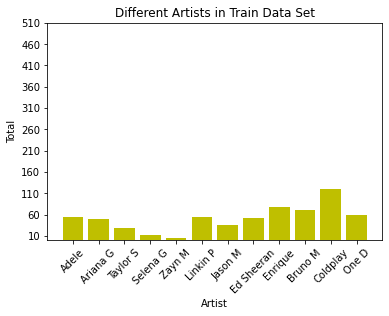

<Figure size 360x576 with 0 Axes>

In [4]:
print("Artists from Training data set")
print(df_train['artist'].unique().tolist())
training_artist = df_train['artist'].unique().tolist()

print(" ")


#df_train['artist'].value_counts()

ad = sum(df_train.loc[:, 'artist'] == 'Adele')
arig = sum(df_train.loc[:, 'artist'] == 'Ariana Grande')
tays = sum(df_train.loc[:, 'artist'] == 'Taylor Swift')
sels = sum(df_train.loc[:, 'artist'] == 'Selena Gomez')
zayn = sum(df_train.loc[:, 'artist'] == 'Zayn Malik')
link = sum(df_train.loc[:, 'artist'] == 'Linkin Park')
jas = sum(df_train.loc[:, 'artist'] == 'Jason Mraz')
eds = sum(df_train.loc[:, 'artist'] == 'Ed Sheeran')
enr = sum(df_train.loc[:, 'artist'] == 'Enrique Iglesias')
bru = sum(df_train.loc[:, 'artist'] == 'Bruno Mars')
cold = sum(df_train.loc[:, 'artist'] == 'Coldplay')
oned = sum(df_train.loc[:, 'artist'] == 'One Direction')

x_axis = ['Adele','Ariana G','Taylor S','Selena G','Zayn M','Linkin P','Jason M','Ed Sheeran','Enrique','Bruno M','Coldplay',
          'One D']
y_axis = (ad,arig,tays,sels,zayn,link,jas,eds,enr,bru,cold,oned) 

# test = df_test['artist'].value_counts()

plt.bar(x_axis,y_axis,align = 'center', color='y')
plt.tick_params(axis ='x', rotation = 45)
plt.yticks(np.arange(10,540, step= 50))
plt.ylabel('Total')
plt.xlabel('Artist')
plt.title('Different Artists in Train Data Set')
plt.figure(figsize=(5,8))
plt.show()

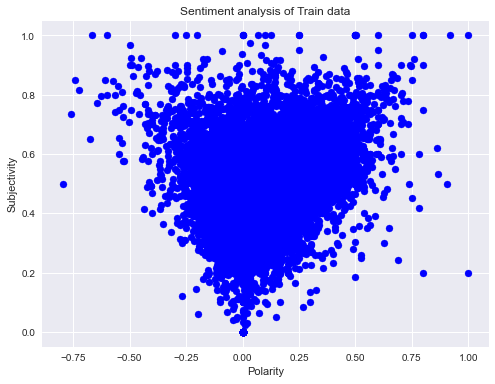

In [19]:
#plot the polarity and subjectivity
plt.style.use('seaborn')
plt.figure(figsize = (8,6))
for i in range(0, df_train.shape[0]):
    plt.scatter(df_train['Polarity'][i], df_train['Subjectivity'][i], color='Blue')

plt.title('Sentiment analysis of Train data')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

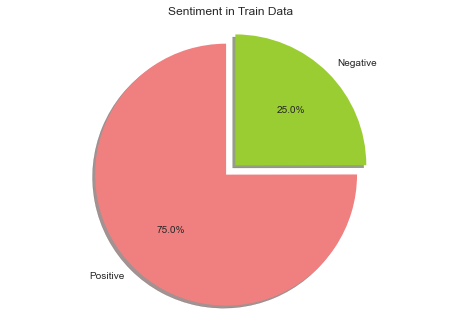

In [23]:
#Ratio of song sentiment
pos = sum(df_train.loc[:, 'Sentiment'] == 'Positive')

neg = sum(df_train.loc[:, 'Sentiment'] == 'Negative')

total = len(df_train)

sizes = (pos,neg)

labels = 'Positive','Negative'

explode = (0.1, 0) 

colors = ['lightcoral', 'yellowgreen']

plt.pie(sizes,explode=explode,  labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Sentiment in Train Data')
plt.axis('equal')
plt.show()

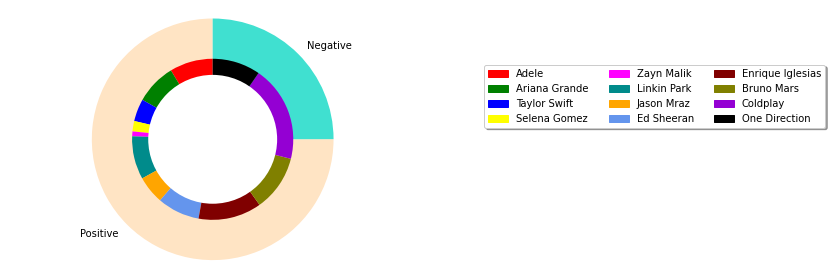

In [6]:
labels_artist = ['Adele','Ariana Grande','Taylor Swift','Selena Gomez','Zayn Malik','Linkin Park','Jason Mraz','Ed Sheeran',
                'Enrique Iglesias','Bruno Mars','Coldplay','One Direction']
sizes_artist = [ad,arig,tays,sels,zayn,link,jas,eds,enr,bru,cold,oned]

colors = ['bisque', 'turquoise']

colors_artist = ['red','green','blue','yellow','magenta','darkcyan','orange','cornflowerblue','maroon','olive','darkviolet',
                'black']

# explode = (0.2,0.2) 
# explode_genre = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)

#Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True,radius=3)
plt.pie(sizes_artist, colors=colors_artist,startangle=90,radius=2 )

#Draw circle
centre_circle = plt.Circle((0,0),1.6,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()

ad_patch = mpatches.Patch(color= colors_artist[0], label='Adele')
arig_patch = mpatches.Patch(color= colors_artist[1], label='Ariana Grande')
tays_patch = mpatches.Patch(color= colors_artist[2], label='Taylor Swift')
sels_patch = mpatches.Patch(color= colors_artist[3], label='Selena Gomez')
zayn_patch = mpatches.Patch(color= colors_artist[4], label='Zayn Malik')
link_patch = mpatches.Patch(color= colors_artist[5], label='Linkin Park')
jas_patch = mpatches.Patch(color= colors_artist[6], label='Jason Mraz')
eds_patch = mpatches.Patch(color= colors_artist[7], label='Ed Sheeran')
enr_patch = mpatches.Patch(color= colors_artist[8], label='Enrique Iglesias')
bru_patch = mpatches.Patch(color= colors_artist[9], label='Bruno Mars')
cold_patch = mpatches.Patch(color= colors_artist[10], label='Coldplay')
oned_patch = mpatches.Patch(color= colors_artist[11], label='One Direction')

plt.legend(handles=[ad_patch,arig_patch,tays_patch,sels_patch,zayn_patch,link_patch,jas_patch,eds_patch,enr_patch ,
                    bru_patch,cold_patch,oned_patch ], bbox_to_anchor=(1.15, 0.8), shadow=True, ncol=3)



plt.show()

In [7]:
from PIL import Image

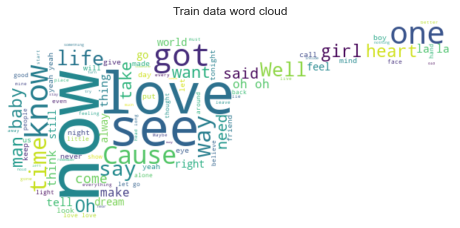

<Figure size 1080x1800 with 0 Axes>

In [25]:
#Wordcloud to identify words in the lyrics

text = " ".join(review for review in df_train.text)

stopwords = set(STOPWORDS)

note_mask = np.array(Image.open("C:/Users/DELL/workspace/sentiment-analysis/img/img.jpg"))

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=100,mask=note_mask).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Train data word cloud')
plt.figure(figsize=[15,25])
plt.show()


In [9]:
#read the test data
df_test =  pd.read_csv("C:/Users/DELL/workspace/sentiment-analysis/data/test.csv")
df_test.head()

,artist,song,text,Subjectivity,Polarity,Sentiment
0,The Beatles,A Shot Of Rhythm And Blues,"Well, if your hands start a-clappin' And your ...",0.686389,0.214444,Positive
1,The Beatles,Across The Universe,Words are flowing out like Endless rain into a...,0.530952,0.110714,Positive
2,The Beatles,All I've Got To Do,"Whenever I want you around, yeah All I gotta d...",0.216667,-0.016667,Negative
3,The Beatles,And I Love Her,I give her all my love That's all I do And if ...,0.575000,0.384375,Positive
4,The Beatles,And Your Bird Can Sing,You tell me that you've got everything you wan...,0.364198,-0.145679,Negative


Artists from Testing data set
['The Beatles', 'Beauty And The Beast', 'Britney Spears', 'Bruno Mars', 'Christina Perri', 'Coldplay', 'Eddie Cochran', 'Eminem', 'Evanescence', 'Falco', 'Fifth Harmony', "Guns N' Roses", 'Hillsong', 'Imagine Dragons', 'Incubus', 'The Jam', 'Judas Priest', 'Justin Bieber', 'Justin Timberlake', 'Kanye West', 'Katy Perry', 'Kelly Clarkson', 'The Killers', 'LL Cool J', 'Lou Reed', 'Madonna', 'Maroon 5', 'Men At Work', 'Metallica', 'Michael Bolton', 'Michael Buble', 'Michael Jackson', 'Michael W. Smith', 'Migos', 'Miley Cyrus', 'Misfits', 'Modern Talking', 'The Monkees', 'Moody Blues', 'Morrissey', 'Mud', "'n Sync", 'Nat King Cole', 'Natalie Cole', 'Natalie Grant', 'Natalie Imbruglia', 'Nazareth', 'Ne-Yo', 'Neil Diamond', 'Neil Sedaka', 'Neil Young', 'New Order', 'Next To Normal', 'Nick Cave', 'Nick Drake', 'Nickelback', 'Nicki Minaj', 'Nightwish', 'Nina Simone', 'Nine Inch Nails', 'Nirvana', 'Nitty Gritty Dirt Band', 'Noa', 'NOFX', 'Norah Jones', 'Notorious B

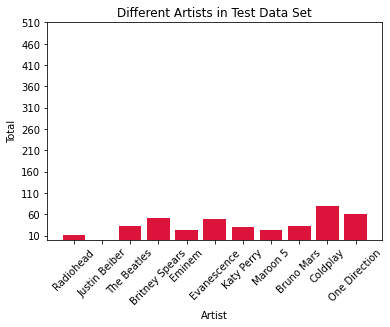

<Figure size 360x576 with 0 Axes>

In [10]:
print("Artists from Testing data set")
print(df_test['artist'].unique().tolist())
testing_artist = df_test['artist'].unique().tolist()

print(" ")


#df_train['artist'].value_counts()

rad = sum(df_test.loc[:, 'artist'] == 'Radiohead')
jb = sum(df_test.loc[:, 'artist'] == 'Justin Beiber')
beat = sum(df_test.loc[:, 'artist'] == 'The Beatles')
bs = sum(df_test.loc[:, 'artist'] == 'Britney Spears')
em = sum(df_test.loc[:, 'artist'] == 'Eminem')
ev = sum(df_test.loc[:, 'artist'] == 'Evanescence')
kp = sum(df_test.loc[:, 'artist'] == 'Katy Perry')
mar = sum(df_test.loc[:, 'artist'] == 'Maroon 5')
bru = sum(df_test.loc[:, 'artist'] == 'Bruno Mars')
cold = sum(df_test.loc[:, 'artist'] == 'Coldplay')
oned = sum(df_test.loc[:, 'artist'] == 'One Direction')

x_axis = ['Radiohead','Justin Beiber','The Beatles','Britney Spears','Eminem','Evanescence','Katy Perry','Maroon 5',
          'Bruno Mars','Coldplay','One Direction']
y_axis = (rad,jb,beat,bs,em,ev,kp,mar,bru,cold,oned) 

# test = df_test['artist'].value_counts()

plt.bar(x_axis,y_axis,align = 'center', color='crimson')
plt.tick_params(axis ='x', rotation = 45)
plt.yticks(np.arange(10,540, step= 50))
plt.ylabel('Total')
plt.xlabel('Artist')
plt.title('Different Artists in Test Data Set')
plt.figure(figsize=(5,8))
plt.show()

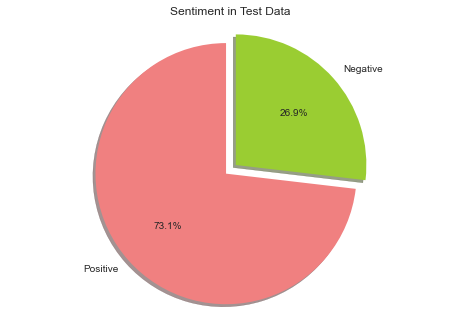

In [24]:
#Ratio of song sentiment
pos = sum(df_test.loc[:, 'Sentiment'] == 'Positive')

neg = sum(df_test.loc[:, 'Sentiment'] == 'Negative')

total = len(df_test)

sizes = (pos,neg)

labels = 'Positive','Negative'

explode = (0.1, 0) 

colors = ['lightcoral', 'yellowgreen']

plt.pie(sizes,explode=explode,  labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Sentiment in Test Data')
plt.axis('equal')
plt.show()

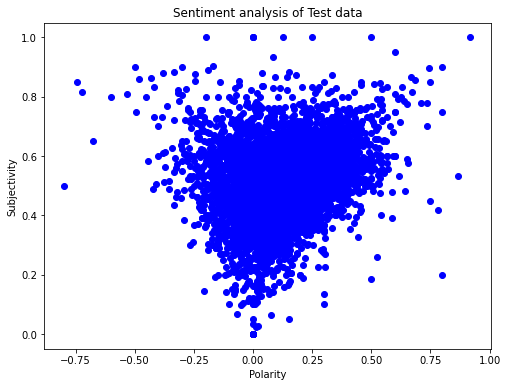

In [27]:
#plot the polarity and subjectivity
plt.style.use('seaborn')
plt.figure(figsize = (8,6))
for i in range(0, df_test.shape[0]):
    plt.scatter(df_test['Polarity'][i], df_test['Subjectivity'][i], color='Blue')

plt.xscale('log')
plt.yscale('log')
plt.title('Sentiment analysis of Test data')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

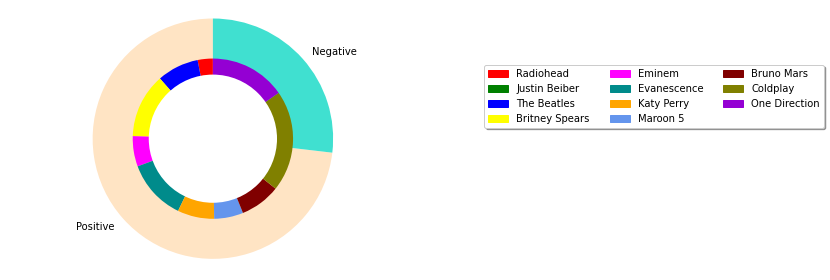

In [12]:
labels_artist = ['Radiohead','Justin Beiber','The Beatles','Britney Spears','Eminem','Evanescence','Katy Perry','Maroon 5',
          'Bruno Mars','Coldplay','One Direction']
sizes_artist = [rad,jb,beat,bs,em,ev,kp,mar,bru,cold,oned]

colors = ['bisque', 'turquoise']

colors_artist = ['red','green','blue','yellow','magenta','darkcyan','orange','cornflowerblue','maroon','olive','darkviolet',
                'black']

# explode = (0.2,0.2) 
# explode_genre = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)

#Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True,radius=3)
plt.pie(sizes_artist, colors=colors_artist,startangle=90,radius=2 )

#Draw circle
centre_circle = plt.Circle((0,0),1.6,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()

rad_patch = mpatches.Patch(color= colors_artist[0], label='Radiohead')
jb_patch = mpatches.Patch(color= colors_artist[1], label='Justin Beiber')
beat_patch = mpatches.Patch(color= colors_artist[2], label='The Beatles')
bs_patch = mpatches.Patch(color= colors_artist[3], label='Britney Spears')
em_patch = mpatches.Patch(color= colors_artist[4], label='Eminem')
ev_patch = mpatches.Patch(color= colors_artist[5], label='Evanescence')
kp_patch = mpatches.Patch(color= colors_artist[6], label='Katy Perry')
mar_patch = mpatches.Patch(color= colors_artist[7], label='Maroon 5')
bru_patch = mpatches.Patch(color= colors_artist[8], label='Bruno Mars')
cold_patch = mpatches.Patch(color= colors_artist[9], label='Coldplay')
oned_patch = mpatches.Patch(color= colors_artist[10], label='One Direction')

plt.legend(handles=[rad_patch,jb_patch,beat_patch,bs_patch,em_patch,ev_patch,kp_patch,mar_patch,bru_patch,
                    cold_patch,oned_patch], bbox_to_anchor=(1.15, 0.8), shadow=True, ncol=3)

plt.show()

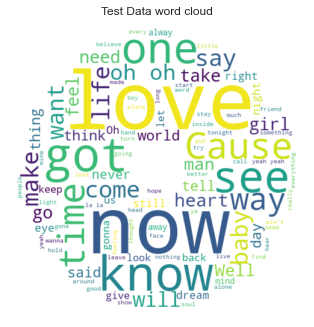

<Figure size 1080x1800 with 0 Axes>

In [26]:
#Wordcloud to identify words in the lyrics

text = " ".join(review for review in df_test.text)

stopwords = set(STOPWORDS)

note_mask = np.array(Image.open("C:/Users/DELL/workspace/sentiment-analysis/img/img1.jpg"))

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=100,mask=note_mask).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Test Data word cloud')
plt.figure(figsize=[15,25])
plt.show()